# Direct-Drive PM Generator Design

Specifications of direct-drive permanent magnet generator for a wind turbine specifications:

- Rated Power: 50 kW
- Rated Speed: 60 rpm
- Surface mounted, radial flux type PM generator
- Outer Diameter < 1.5 m
- Total Mass < 1000 kg

In [17]:
import math
Prated=50000 #watt
n=60 #rpm =1hz
Dout=1.5 #m
Mtotal=1000 #kg
print ('Rated Power=',Prated, 'watt')
print ('Rated Speed=',n, 'rpm')
print ('Outer Diameter =',Dout, 'm')
print ('Total Mass =',Mtotal, 'kg')


Rated Power= 50000 watt
Rated Speed= 60 rpm
Outer Diameter = 1.5 m
Total Mass = 1000 kg


Stator design of the PM machine is very similar to induction motor's.

### Machine Dimensions

In the second project (train traction induction motor), we used the 'X' term to find the relation between Din, Dout and L. However; in this project we do not have the number of poles. For this time, assume Din is equal to 0.7*Dout.

In [18]:
Din=Dout*0.7
print ('Inner diameter=',Din, 'm')

Inner diameter= 1.0499999999999998 m


Now, lets find the mechanical constant of the machine. However; to do this, we cannot use the Cmech graph in the book (changing with number of pole). While finding the constant assume peak of Bm is 0.7T and electrical loading 22000.

In [19]:
from math import pi
from math import sqrt
Arms=22000
Bm=0.7
Cmech=(pi**2/sqrt(2))*Arms*Bm
L=(Prated/(Cmech*2*pi/4*Din**(2)))
print ('Length of the machine', L)

Length of the machine 0.26863714346245904


In [20]:
Rin=Din/2
Cevre=2*pi*Rin
slot_num=Cevre/0.01/2 
print ('number of slot',slot_num)

number of slot 164.93361431346412


Lets take the slot number 162:

In [21]:
slot_num=162

In [22]:
p=slot_num/3
print('pole number',p)

pole number 54.0


In [23]:
A=Cevre*L/p
f=n*p/120
E=220 #sebeke
turnperphase=E/(4.44*f*Bm*A)
print('num of turns per phase',turnperphase)

num of turns per phase 159.75940478632782


Lets take number of turns per phase 160:

In [24]:
turnperphase=160

In [25]:
conductorperslot=turnperphase/p*2
print('the number of conductors per slot',conductorperslot)

the number of conductors per slot 5.925925925925926


In [26]:
conductorperslot=6 #iteration

In [27]:
Iln=Prated/(3*220)
print(Iln)

75.75757575757575


In [28]:
Jco=3
Aco=Iln/Jco/1000000
print(Aco)

2.525252525252525e-05


In [29]:
Aco=26.7e-6

In [30]:
Atotal=Aco*conductorperslot
print(Atotal)

0.0001602


In [31]:
Kfill=0.44
Anet=Atotal/Kfill
print(Anet)

0.00036409090909090907


In [32]:

bos=0.0025
hos=0.0005
hw=0.001
bts=0.008
hs=Anet/bts
print(hs)

0.045511363636363635


In [33]:
Bcoremax=1.4
hcs=Bm*A/(2*L*Bcoremax) #back core kalinligi
print(hcs)

0.015271630954950382


In [34]:
Dout_new=Din+2*hcs+2*hs+2*hos+2*hw
print(Dout_new)

1.174565989182628


### Magnet Thickness

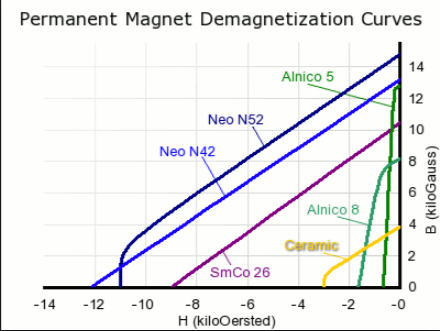

In [15]:
from IPython.display import Image
Image(filename='magnet.png')

In [35]:
lg=0.001 #airgap
μo=1.256*0.000001
Hg=Bm/μo #neglect fringing effect
Hm=238732 #A/m 3k oersted
lm=Hg*lg/Hm
print(lm)

0.0023345208885458637


### Resistances

In [36]:
polepitch=pi*Din/p
print(polepitch)
lend=polepitch

0.06108652381980152


In [37]:
ltotal=2*(L+lend)*conductorperslot*p
print(ltotal) #copper length

213.66093639890482


In [38]:
ρco=2.17*10**-8 #for copper
Rco=ltotal*ρco/Aco
print('stator resistance', Rco)

stator resistance 0.1736495250882485


### Efficiency

In [39]:
pco=3*Rco*Iln*Iln
print('the stator winding losses', pco, 'W')

the stator winding losses 2989.8334209409168 W


In [40]:

pmv=0.008*Prated
print('the mechanical/ventilation losses', pmv, 'W')

the mechanical/ventilation losses 400.0 W


In [41]:
pstray=0.01*Prated
print('the stray losses', pstray, 'W')

the stray losses 500.0 W


In [42]:
p10=2.5    #specific losses in W/Kg at 1.0 Tesla and 50 Hz p10 = (2–3)
Kt=1.65    #Kt = (1.6 – 1.8)
Ky=1.6
γiron=7800
Gt1=γiron*slot_num*bts*(hs+hw+hos)*L #stator tooth weight
Gy1=γiron*math.pi/4*(Dout_new**2-(Dout_new-2*hcs)**2)*L #stator yoke weight
print(Gt1,'kg')
print(Gy1,'kg')

127.66401940548168 kg
116.54393541912677 kg


In [43]:
Bcs=1.4 #assumed before
py1=Ky*p10*(f/50)**1.3*Bcs**1.7*Gy1
print('yoke core fundamental component power loss', py1, 'W')
pt1=Kt*p10*(f/50)**1.3*(Bm*2)**1.7*Gt1
print('teeth core fundamental component power loss', pt1, 'W')

yoke core fundamental component power loss 370.7483431512285 W
teeth core fundamental component power loss 418.814794943243 W


In [44]:
piron1=py1+pt1
print('fundamental iron losses', piron1, 'W')

fundamental iron losses 789.5631380944715 W


In [45]:
Totalloss=pco+pmv+pstray+piron1
print('Total loss of the IM', Totalloss, 'W')

Total loss of the IM 4679.396559035388 W


In [46]:

η=Prated/(Prated+Totalloss)
print('Efficiency of the machine (η) is', η )

Efficiency of the machine (η) is 0.9144212106660099


In [47]:
T=pi*pi*Bm*22000*Din*Din*L/4/sqrt(2)
print('Torque', T )

Torque 7957.747154594767


### Magnetizing MMFs

In [49]:
Fmagnet=Hm*lm*2
print('magnet MMF',Fmagnet)

Fairgap=-Hg*lg*2
print('airgap MMF',Fairgap)

magnet MMF 1114.6496815286623
airgap MMF -1114.6496815286623


Actually, magnet creates negative mmf and Fairgap is positive. They almost cancel eachother. Frotor and Fstator are very small values.

### RMxprt Results

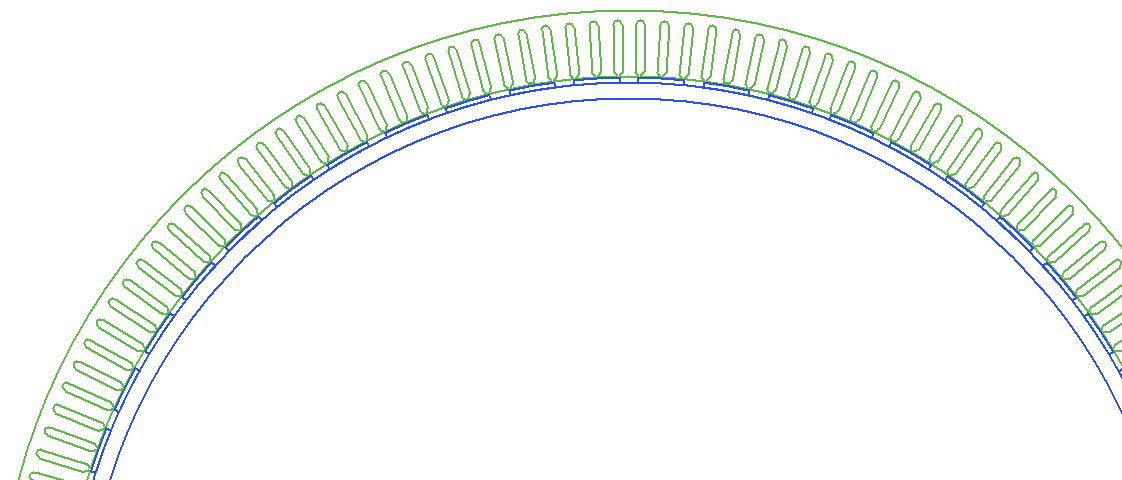

In [1]:
from IPython.display import Image
Image(filename='statorrotor.png')

Airgap flux density from RMxprt:

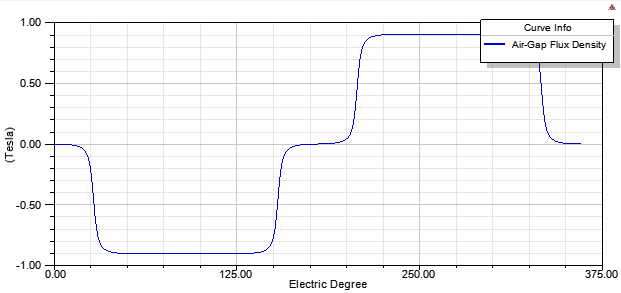

In [3]:
from IPython.display import Image
Image(filename='airgapfluxdensity.png')

Induced winding currents:

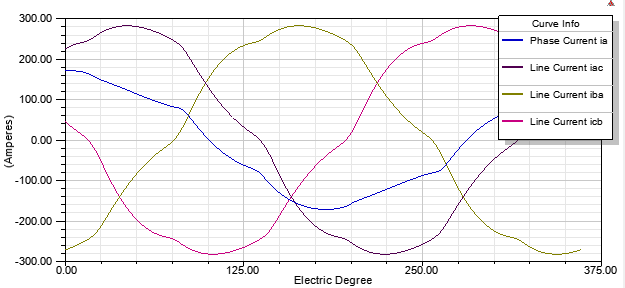

In [4]:
from IPython.display import Image
Image(filename='windingcurrents.png')

Winding voltage:

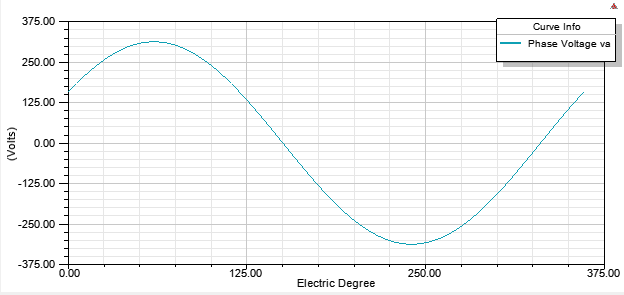

In [5]:
from IPython.display import Image
Image(filename='windingvoltage.png')

No-load Operation 

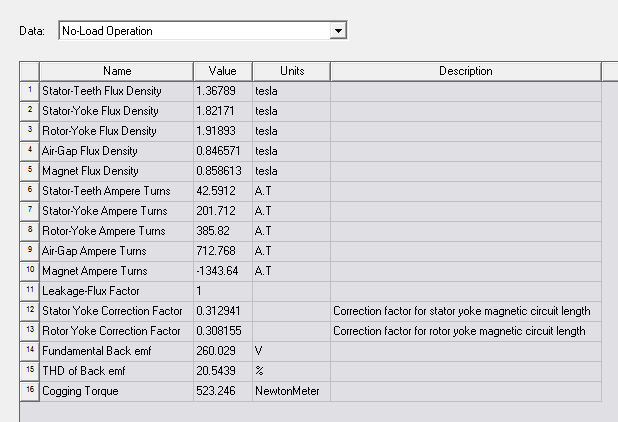

In [6]:
from IPython.display import Image
Image(filename='noload.png')

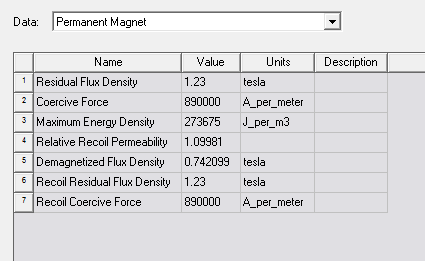

In [7]:
from IPython.display import Image
Image(filename='pm.png')

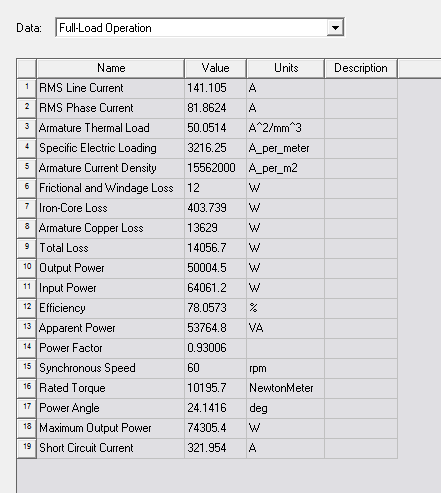

In [8]:
from IPython.display import Image
Image(filename='fullload.png')

### FEMM Results

Meshed analysis is below:

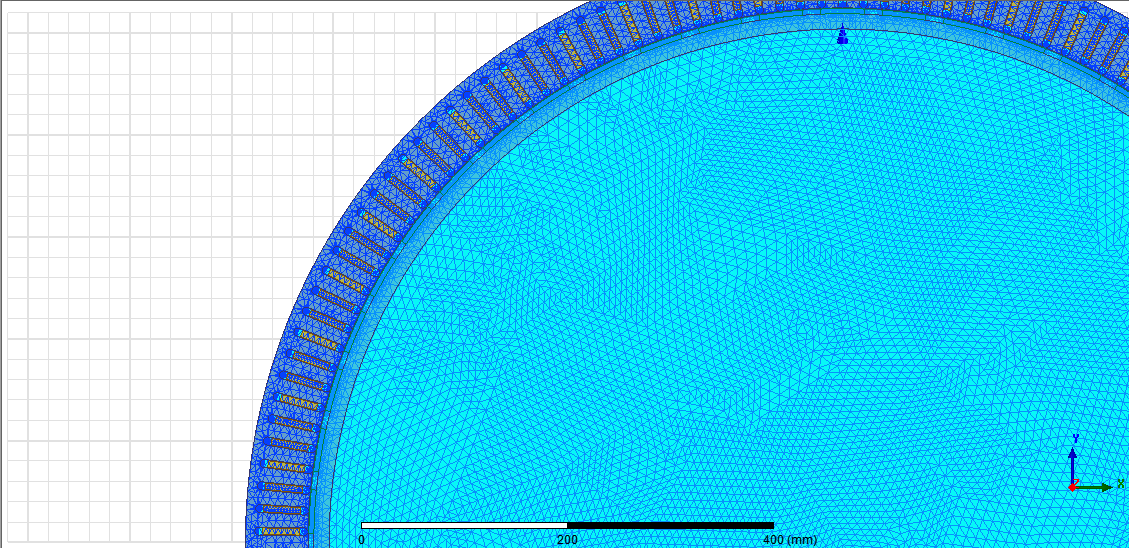

In [9]:
from IPython.display import Image
Image(filename='mesh.png')

Airgap flux density vs distance:

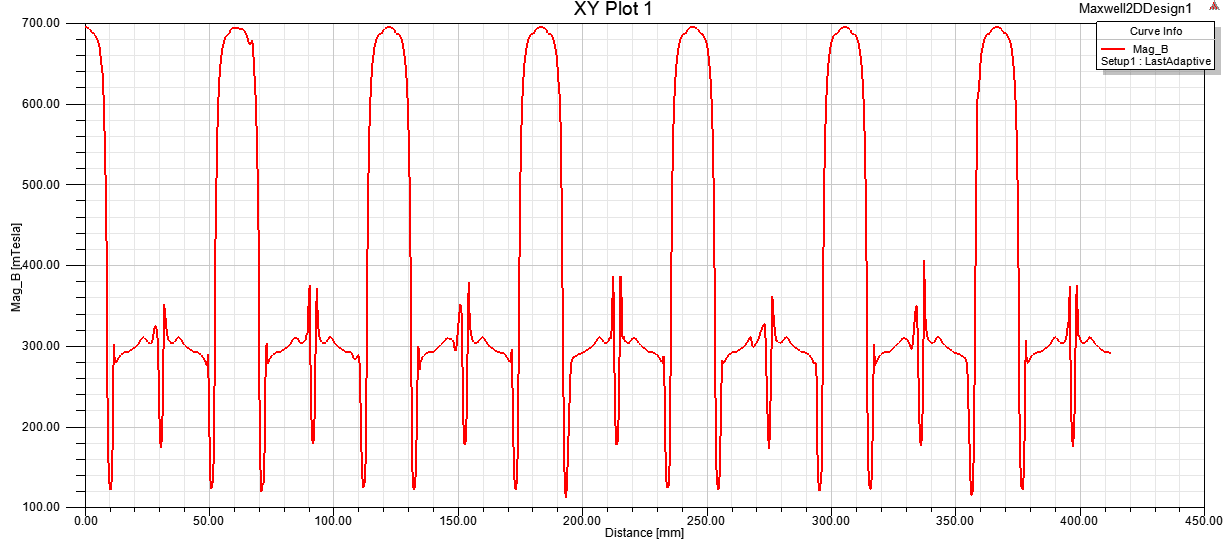

In [10]:
from IPython.display import Image
Image(filename='airgapfluxdensity_FEMM.png')

Flux density graph in a magnet:

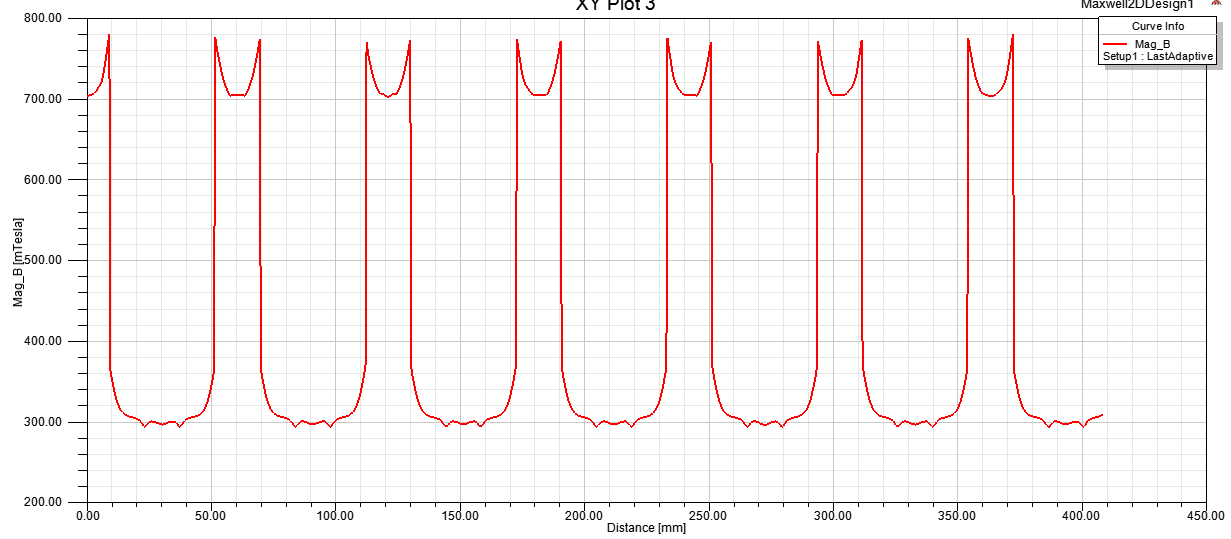

In [11]:
from IPython.display import Image
Image(filename='Binmagnet_FEMM.png')

Flux density in a tooth:

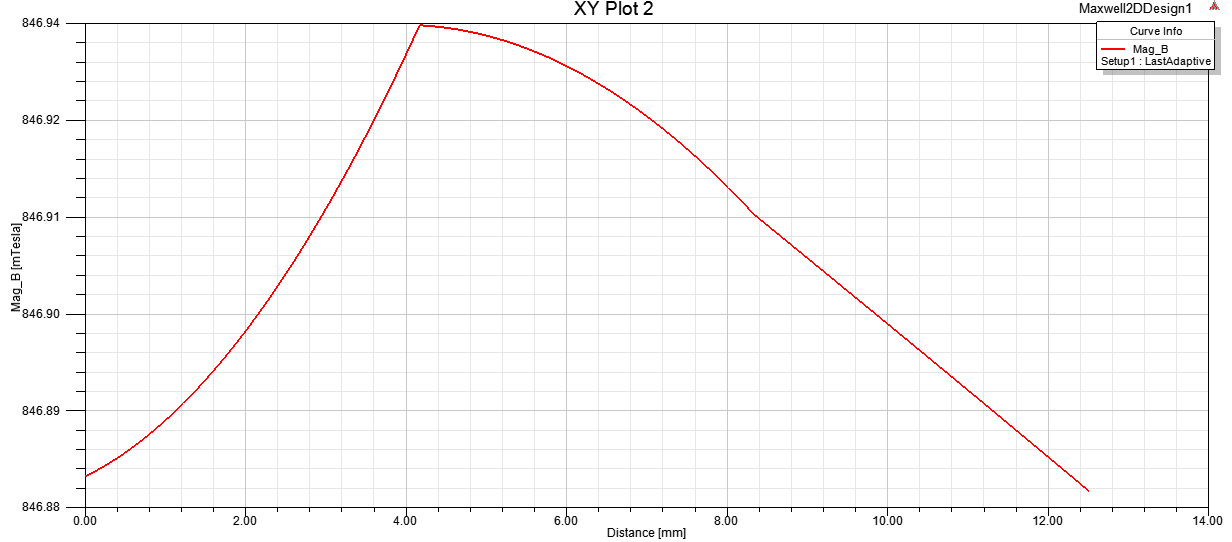

In [12]:
from IPython.display import Image
Image(filename='Bintooth_FEMM.png')

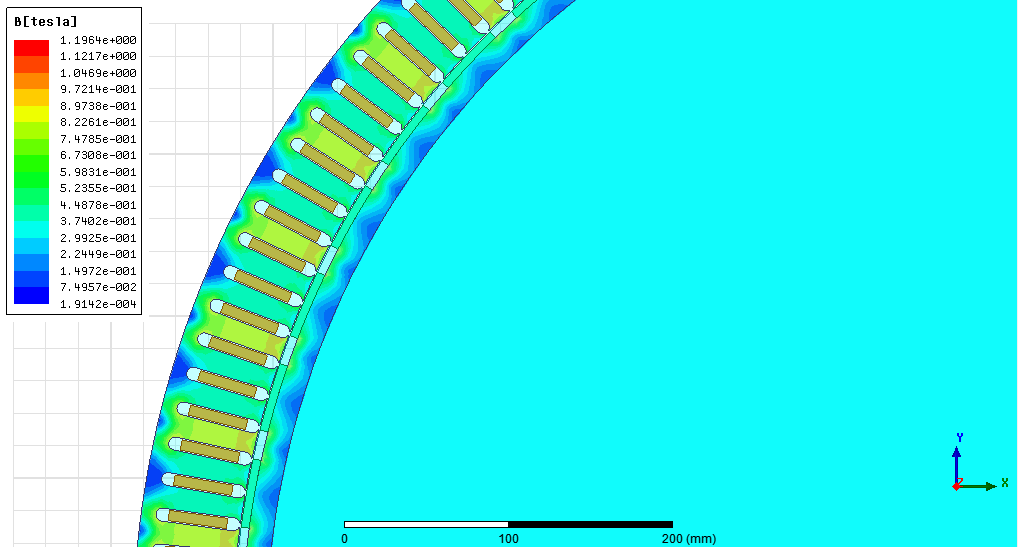

In [13]:
from IPython.display import Image
Image(filename='Bmagnitude.png')

### Conclusion
- A permanent magnet synchronous generator is a generator where the excitation field is provided by a permanent magnet instead of a coil
- PM generator stator design is very similar to IM stator design. (see project 2)
- But this time Kw approximately 1.
- Hence, PM machines has large number of poles and slots. 
- Also, the number of magnets in the rotor is equal to number of stator poles.
- Because of the unity Kw, magnatization mmfs of airgap and magnets cancel eachother. Stator and rotor mmfs are smaller than these so we can say that we can neglect the magnatization issue for this kind of machines.
- During the analytical calculation of magnet length, we can assume the core is infinitly permeable. Then we can use: Hg*lg=Hm*lm
- RMxprt calculates the mass of the machine approximately 700kg which is okay for the specs.
- We do not have torque speed characteristic this time because this is synchronuos machine.
- The thickness of the magnet is determined by using the characteristic of the magnet as you can see from the B H curve of the magnets. In this graph, I choosed the NeoN42.
- Induced current graphs from RMxprt results have harmonic components. With use of this machice, it is important to use a filter to eleminate these disturbances.
- I calculated the efficiency 91% analytically; however, in FEMM simulations it is 79%. In FEMM simulations copper loss is larger than I calculated. If one increases the number of the conductor per slot, efficiency increases.
- Torque is found 10000Nm in FEMM. According to my calculations it is 8000Nm which is close to that one and also it is similar to specs(power and speed is given)
- Maximum airgap flux density is 0.7 T in the simulations which is the same with my assumptions during the calculations.
- Flux density in the tooth is almost constant as we expect. 

### References
- K&Jmagnetics.Inc, Demagnetization (BH) Curves for Neodymium Magnets, Online 'https://www.kjmagnetics.com/bhcurves.asp', nd.
- Permanent magnet synchronous generator, Online 'https://en.wikipedia.org/wiki/Permanent_magnet_synchronous_generator' nd.